In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
input_image = cv2.imread("../saved/apple.jpg")
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

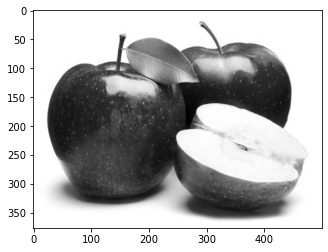

In [3]:
plt.imshow(gray,cmap="gray")

In [4]:
rand = np.random.random((2,3)) * 0.01
rand[:,-1] = rand[:,1]*-10000
affine_matrix = np.eye(2,3) -  rand
affine_matrix = np.array([[0.695,0.0001,10],[0.001,0.5442,12]])

In [5]:
gray_warped = cv2.warpAffine(gray,affine_matrix,dsize=(200,200))

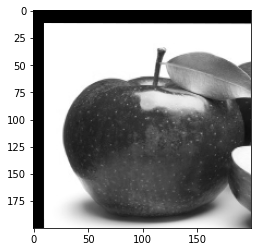

In [6]:
plt.imshow(gray_warped,cmap="gray")

In [28]:
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 50,  1e-10)
warp_matrix = np.eye(2, 3, dtype=np.float32)
warp_mode = cv2.MOTION_AFFINE

In [29]:
(cc, warp_matrix) = cv2.findTransformECC (gray,gray_warped,warp_matrix, warp_mode, criteria)

In [30]:
warp_matrix

array([[6.9199431e-01, 5.1851949e-04, 1.0475565e+01],
       [5.2657892e-04, 5.4169881e-01, 1.2642053e+01]], dtype=float32)

In [40]:
predicted_warp_image = cv2.warpAffine(cv2.resize(gray,(200,200)), affine_matrix, gray_warped.shape, flags=cv2.INTER_LINEAR+ cv2.WARP_INVERSE_MAP)

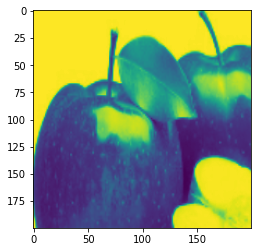

In [41]:
plt.imshow(predicted_warp_image)

In [31]:
gray_warped.shape

(200, 200)